In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime


%matplotlib inline
color = sns.color_palette()

In [2]:
df = pd.read_csv(r'C:\\Users\\mthokozisi\\Desktop\\ZHS Analytics\\Projects\\E-Commerce\\data.csv\\data.csv', header=0, encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Cleaning


#### Data format cleaning

###### Columns will be renamed for simple analysis in the following format:

In [4]:
df.rename(columns = {'InvoiceNo':'invoice_num',
                    'StockCode':'stock_code',
                    'Description':'description',
                    'Quantity':'quantity',
                    'InvoiceDate':'invoice_date',
                    'UnitPrice':'unit_price',
                    'CustomerID':'customer_id',
                    'Country':'country'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


###### The invoice_date column will be converted from 'object' to 'datetime' format

In [6]:
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

###### The 'description' column will be converted into lower case

In [7]:
df['description'] = df.description.str.lower()

In [8]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Missing data analysis and handling

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


###### There are some missing values in the 'customer_id' and 'description' columns. The exact numbers and percentages are:

In [10]:
#Calculating total and percentage of missing values

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(df)

,Total,Percent
customer_id,135080,24.926694
description,1454,0.268311
invoice_num,0,0.000000
stock_code,0,0.000000
quantity,0,0.000000
invoice_date,0,0.000000
unit_price,0,0.000000
country,0,0.000000


###### The section of data that contains missing values is as follows:

In [11]:
df_miss = df[df.isnull().any(axis=1)]
df_miss.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


#### Is there any relationship between the missing data

In [12]:
df_miss.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [13]:
df_miss["day"] = df_miss['invoice_date'].map(lambda x: x.day)
df_miss["month"] = df_miss['invoice_date'].map(lambda x: x.month)
df_miss["year"] = df_miss['invoice_date'].map(lambda x: x.year)

In [14]:
df_miss['daymonth']=df_miss['day'].astype(str)+'/'+df_miss['month'].astype(str)
df_miss['daymonthyear']=df_miss['daymonth'].astype(str)+'/'+df_miss['year'].astype(str)
df_miss['monthyear']=df_miss['month'].astype(str)+'/'+df_miss['year'].astype(str)

In [15]:
df_miss.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,day,month,year,daymonth,daymonthyear,monthyear
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010


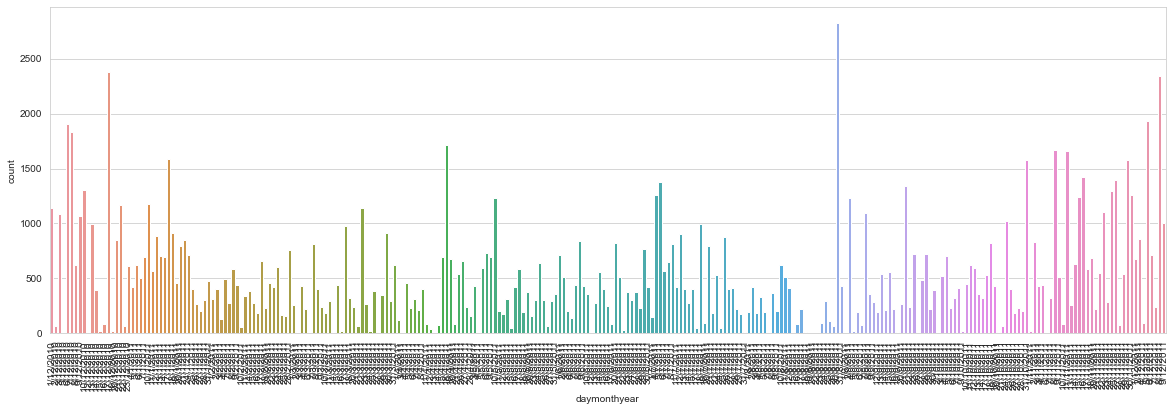

In [16]:
fig, ax = plt.subplots(figsize=(20,6)) 
ax = sns.countplot(x='daymonthyear', data=df_miss)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

###### Although the plot is messy, there are clear indications that some of the days had more missing values than others. The particular days with the high missing values are shown below:

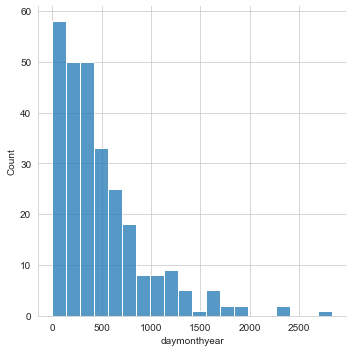

In [17]:
sns.displot(df_miss['daymonthyear'].value_counts())

###### It is evident that some days had over 2500 missing customer_id's. NOw we examine the days where most of the customer id are missing

In [18]:
df_miss['daymonthyear'].value_counts()[:20]

30/8/2011     2829
17/12/2010    2384
8/12/2011     2341
5/12/2011     1933
6/12/2010     1904
7/12/2010     1830
18/4/2011     1719
8/11/2011     1671
11/11/2011    1656
17/1/2011     1591
29/11/2011    1577
31/10/2011    1576
16/11/2011    1423
25/11/2011    1400
5/7/2011      1375
21/9/2011     1338
10/12/2010    1309
24/11/2011    1293
30/11/2011    1259
4/7/2011      1256
Name: daymonthyear, dtype: int64

###### Further analysis is required to determine the cause of the missing values. However for this analysis we will drop the missing values and create a new dataframe labelled df_new

In [19]:
df_new=df.dropna()

In [20]:
# Checking if there are missing values in the new dataframe
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


###### The dataframe is now devoid of missing values

#### Handling duplicated values

In [22]:
df_new[df_new.duplicated()].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
517,536409,21866,union jack flag luggage tag,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,hand warmer scotty dog design,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,set 2 tea towels i love london,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,scottie dog hot water bottle,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,round snack boxes set of 4 skulls,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [23]:
df_new.duplicated().sum()

5225

###### The results suggest that there are 5225 duplicated transaction. Therefore these will be dropped from the dataset

In [24]:
df_new.drop_duplicates(inplace=True)

In [25]:
df_new.duplicated().sum()

0

#### Change of column data types

###### The 'customer_id' column will be converted to 'int' from 'float'

In [26]:
df_new['customer_id']=df_new.customer_id.astype('int64')

In [27]:
df_new.describe()

,quantity,unit_price,customer_id
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


###### There are issues with some columns i.e. 'quantity' has negative value and the unit price has a minimum of 0

In [28]:
np.sum(df_new['quantity'] < 0)

8872

###### There are 8872 transactions with negative values in 'quantity'. Further analysis will be undertaken to get more insight from these transactions

#### Analysing cancelled orders


In [29]:
canceled_orders = df_new[df_new['invoice_num'].apply(lambda x: x[0]=='C')]
canceled_orders.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [30]:
(canceled_orders['quantity'] < 0).sum()

8872

###### All transactions with a negative value have been confirmed to be cancelled orders

In [31]:
print('The percentage of cancelled orders is: {} %'.format(round(canceled_orders.shape[0]/df_new.shape[0]*100,2)))

The percentage of cancelled orders is: 2.21 %


#### Analysing discounts

In [32]:
discounts = df_new[df_new['stock_code'].apply(lambda order: order=='D')]
discounts.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
9038,C537164,D,discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom
14498,C537597,D,discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom
19392,C537857,D,discount,-1,2010-12-08 16:00:00,267.12,17340,United Kingdom
31134,C538897,D,discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom


In [33]:
discounts.shape

(77, 8)

77 discounts were issued. Further examination to determine if there are other discounts in the original dataset was conducted 

In [34]:
df[df['stock_code'].apply(lambda order: order=='D')].shape[0]

77

###### All the discounts are correctly included in the transactions with negative values. These values will be dropped from the dataframe.

In [35]:
df_new = df_new[df_new['quantity'] > 0]
df_new.sort_values(by='stock_code', ascending=False, inplace=True)
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
299512,563100,POST,postage,6,2011-08-12 09:57:00,40.0,12381,Norway
224432,556526,POST,postage,1,2011-06-13 11:33:00,18.0,12732,France
186640,552874,POST,postage,7,2011-05-12 09:40:00,18.0,12621,Germany
103055,545051,POST,postage,1,2011-02-27 11:58:00,18.0,12599,France
477044,577046,POST,postage,7,2011-11-17 13:46:00,18.0,12449,Belgium


In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 299512 to 30249
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  object        
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   customer_id   392732 non-null  int64         
 7   country       392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


#### Checking for transactions of special items:

###### Regex will be used to check the presence of special items

In [37]:
import re
spec_list=[]
for code in df_new.stock_code:
    x=re.findall(r"^\w{1}$|\D[A-Z]+\D|[A-Z]\d", code)
    if x not in spec_list:
        if len(x) >0 :
            spec_list.append(x)
spec_list

[['POST'], ['PADS'], ['M'], ['DOT'], ['C2'], ['BANK ', 'CHARGES']]

###### ['BANK ', 'CHARGES'] will be renamed into ['BANK CHARGES']:

In [38]:
spec_list[5] = ['BANK CHARGES']

###### The spec_list will be transformed into into a single list

In [39]:
spec_list2=[item for sublist in spec_list for item in sublist]
spec_list2

['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']

###### All transactions related to special items will be ckecked

In [40]:
df_new[df_new['stock_code'].apply(lambda x: x in spec_list2)]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
299512,563100,POST,postage,6,2011-08-12 09:57:00,40.0,12381,Norway
224432,556526,POST,postage,1,2011-06-13 11:33:00,18.0,12732,France
186640,552874,POST,postage,7,2011-05-12 09:40:00,18.0,12621,Germany
103055,545051,POST,postage,1,2011-02-27 11:58:00,18.0,12599,France
477044,577046,POST,postage,7,2011-11-17 13:46:00,18.0,12449,Belgium
...,...,...,...,...,...,...,...,...
327921,565735,BANK CHARGES,bank charges,1,2011-09-06 12:25:00,15.0,16904,United Kingdom
62508,541505,BANK CHARGES,bank charges,1,2011-01-18 15:58:00,15.0,15939,United Kingdom
440745,574546,BANK CHARGES,bank charges,1,2011-11-04 14:59:00,15.0,13651,United Kingdom
506357,579137,BANK CHARGES,bank charges,1,2011-11-28 12:51:00,15.0,14704,United Kingdom


###### There are other types of transactions included in the dataset. They will be dropped.These special transations are: POST ( postage), M ( manual), Bank charges and C2 ( carriage)

In [41]:
df_new = df_new[~df_new['stock_code'].isin(spec_list2)]

In [42]:
print("The number of transactions is: ", df_new.shape[0])

The number of transactions is:  391183


###### Therefore 1549 elements have been dropped

#### Feature Engineering

###### A column labelled 'Amount spent' will be added

In [43]:
df_new['amount_spent']=df_new['quantity'] * df_new['unit_price']

In [44]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent
527069,580691,90214Z,"letter ""z"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48
193006,553503,90214Y,"letter ""y"" bling key ring",1,2011-05-17 13:20:00,1.25,14606,United Kingdom,1.25
527068,580691,90214Y,"letter ""y"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48
532744,580996,90214Y,"letter ""y"" bling key ring",48,2011-12-06 17:18:00,0.29,14578,United Kingdom,13.92
527067,580691,90214W,"letter ""w"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48


###### The columns will be reordered to make referencing easier

In [45]:
df_new=df_new[['invoice_num', 'invoice_date', 'stock_code', 'description', 'quantity', 'unit_price', 'amount_spent', 'customer_id', 'country']]

In [46]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527068,580691,2011-12-05 15:48:00,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
532744,580996,2011-12-06 17:18:00,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
527067,580691,2011-12-05 15:48:00,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


###### The day, month and year columns will be created

In [47]:
df_new.insert(loc=2, column='yearmonth', value=df_new['invoice_date'].map(lambda x: 100 * x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek) + 
              1) # +1 is used to make Monday=1.....until Sunday=7
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [48]:
df_new.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
532744,580996,2011-12-06 17:18:00,201112,12,2,17,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


###### The dataset can now be used for EDA

## Exploratory Data Analysis (EDA)

#### How many orders by the customers?

In [49]:
orders=df_new.groupby(by=['customer_id','country'], as_index=False)['invoice_num'].count()
orders.head()

,customer_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,27
3,12349,Italy,72
4,12350,Norway,16


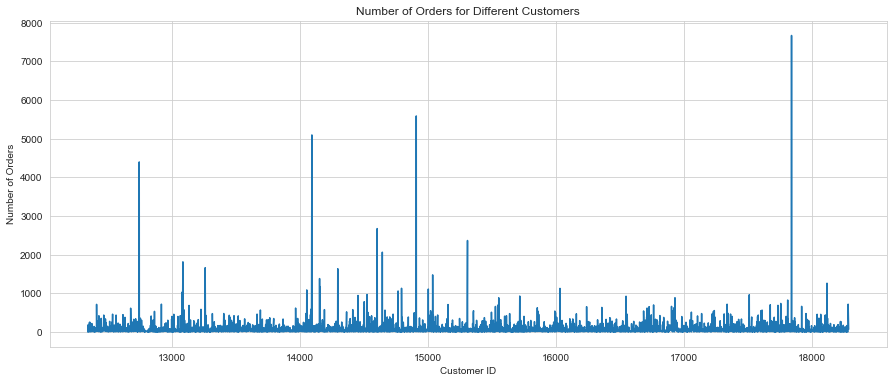

In [50]:
plt.subplots(figsize=(15,6))
plt.plot(orders.customer_id, orders.invoice_num)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Different Customers')
plt.show()

#### The TOP 5 most number of orders is:

In [51]:
orders.sort_values(by='invoice_num', ascending=False).head()

,customer_id,country,invoice_num
4016,17841,United Kingdom,7667
1888,14911,EIRE,5586
1298,14096,United Kingdom,5095
334,12748,United Kingdom,4397
1670,14606,United Kingdom,2674


#### How much money spent by the customers?

In [52]:
money_spent = df_new.groupby(by=['customer_id','country'], as_index=False)['amount_spent'].sum()
money_spent.head()

,customer_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1437.24
3,12349,Italy,1457.55
4,12350,Norway,294.40


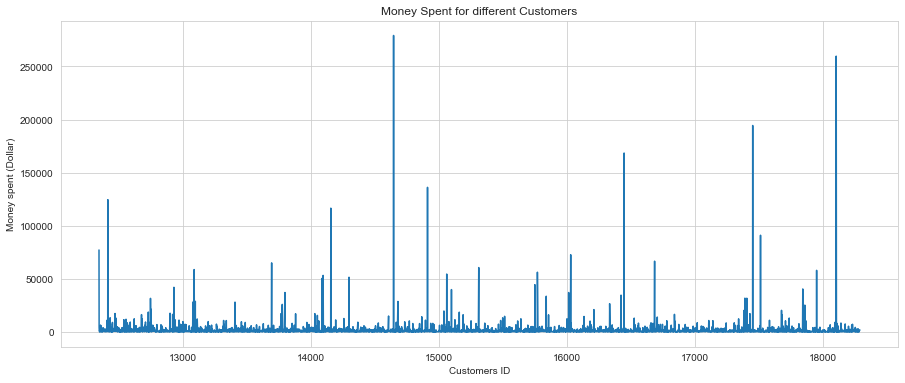

In [53]:
plt.subplots(figsize=(15,6))
plt.plot(money_spent.customer_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

#### The TOP 5 most highest money spent

In [54]:
money_spent.sort_values(by='amount_spent', ascending=False).head()

,customer_id,country,amount_spent
1698,14646,Netherlands,279138.02
4206,18102,United Kingdom,259657.30
3734,17450,United Kingdom,194390.79
3015,16446,United Kingdom,168472.50
1888,14911,EIRE,136161.83


#### Pattern Discovery

###### The number of orders in the different months (1st Dec 2010 - 9th Dec 2011)

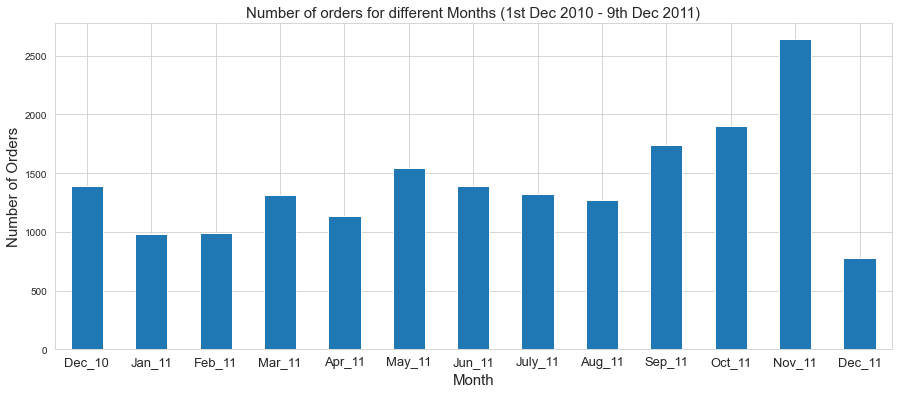

In [55]:
ax = df_new.groupby('invoice_num')['yearmonth'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

###### The month of November 2011 had the highest number of orders

#### How many orders per day?

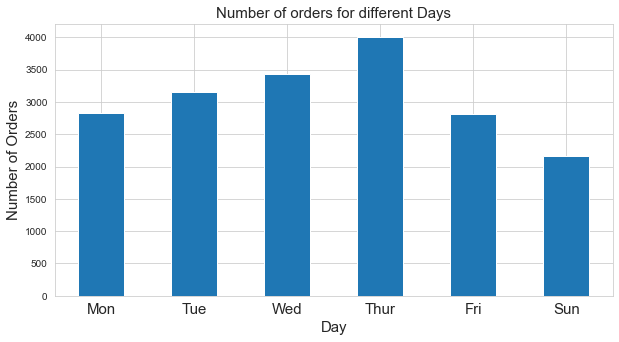

In [56]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(10,5))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

###### Thursdays had the highest number of orders

#### Unit Price Pattern Discovery

In [57]:
df_new.unit_price.describe()

count    391183.000000
mean          2.874130
std           4.284639
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: unit_price, dtype: float64

###### The results show that some orders had 0 unit price

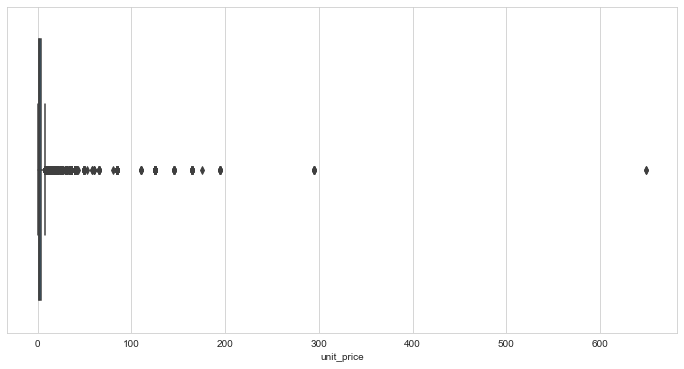

In [58]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

###### The majority of the products seem to have a price less that 20 hence 20 will be used as a threshold to further analyse the unit price

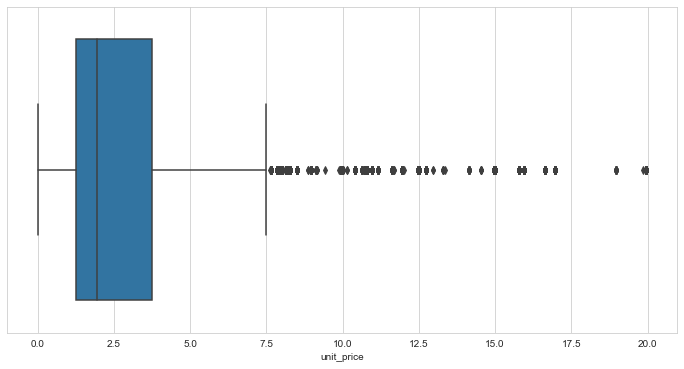

In [59]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new[df_new['unit_price'] < 20].unit_price)
plt.show()

In [60]:
df_free=df_new[df_new['unit_price'] == 0]
df_free.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
502122,578841,2011-11-25 15:57:00,201111,11,5,15,84826,asstd design 3d paper stickers,12540,0.0,0.0,13256,United Kingdom
86789,543599,2011-02-10 13:08:00,201102,2,4,13,84535B,fairy cakes notebook a6 size,16,0.0,0.0,17560,United Kingdom
187613,553000,2011-05-12 15:21:00,201105,5,4,15,47566,party bunting,4,0.0,0.0,17667,United Kingdom
446794,574920,2011-11-07 16:34:00,201111,11,1,16,23480,mini lights woodland mushrooms,1,0.0,0.0,13985,United Kingdom
480649,577314,2011-11-18 13:23:00,201111,11,5,13,23407,set of 2 trays home sweet home,2,0.0,0.0,12444,Norway


#### How many free items are sold on each month?

In [61]:
df_free.yearmonth.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     5
201110     2
201111    11
Name: yearmonth, dtype: int64

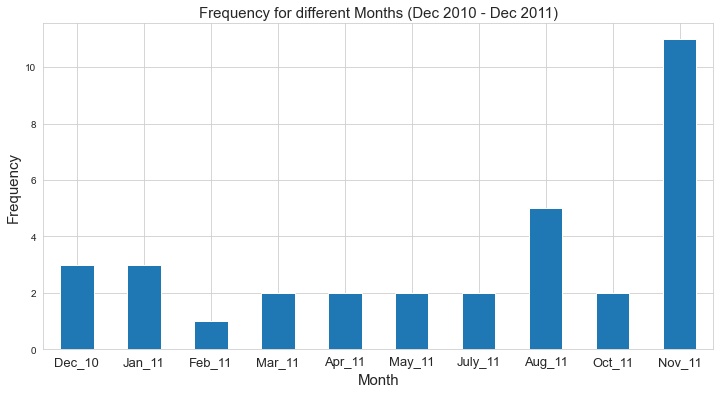

In [62]:
ax = df_free.yearmonth.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

###### The month of November 2011 saw the company give away the most free items. Also there no free items given in June 2011 and Sept 2011.

#### Country Pattern Discovery

#### How many orders for each country?

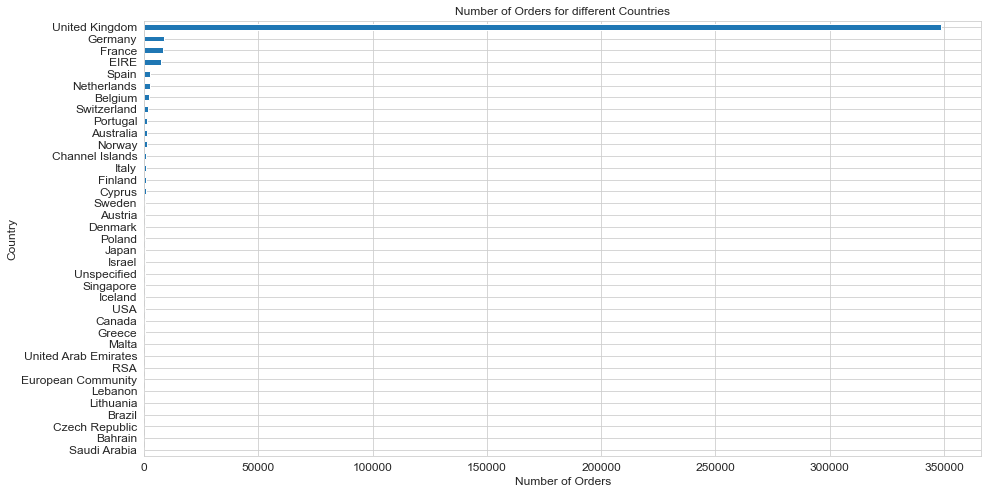

In [63]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

###### The company is based in UK, so it seems natural that the country with most sold items is UK.For further analysis, UK will be dropped

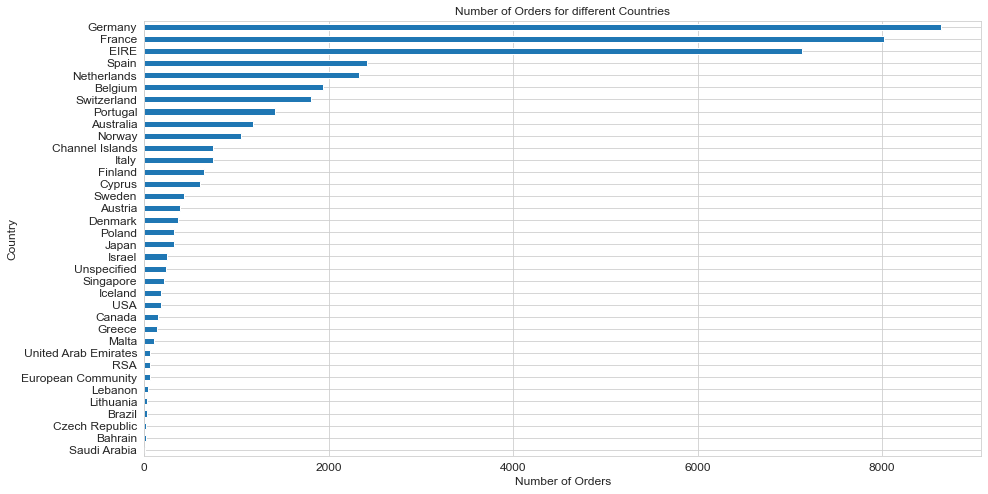

In [64]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

###### Germany and France are the two countries where customers spent the most money, with UK excluded.

#### How much money spent by each country?

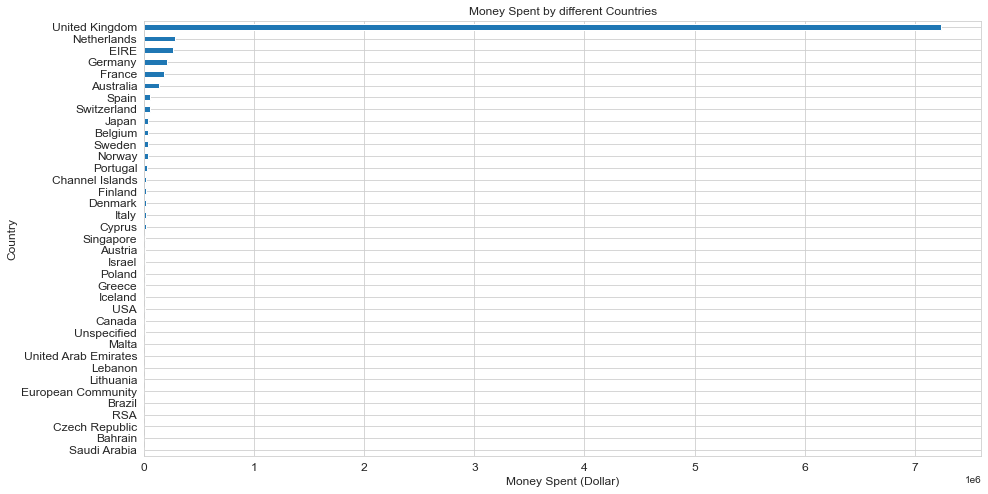

In [65]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

###### For similar reason as above, we will exclude UK for this analysis.

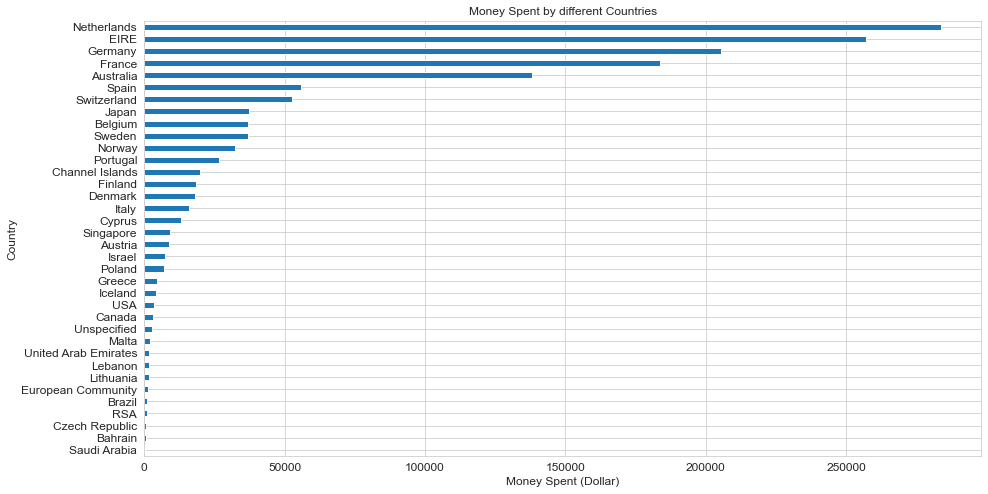

In [66]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']
# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

###### Excluding the UK, customers from the Netherlands, EIRE, Germany, France and Australia spent the most money on the website.

#### Sold product Analysis

In [67]:
df_new.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
532744,580996,2011-12-06 17:18:00,201112,12,2,17,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


In [68]:
df_new['stock_code'].nunique()

3659

###### There are 3659 different sold products

#### Which products are the most sold?

In [69]:
most_sold_products=df_new.groupby(by=['stock_code','description'])['quantity'].sum().sort_values(ascending=False).iloc[:50]
df_top_prod=most_sold_products.to_frame().reset_index()
df_top_prod.head()

,stock_code,description,quantity
0,23843,"paper craft , little birdie",80995
1,23166,medium ceramic top storage jar,77916
2,84077,world war 2 gliders asstd designs,54319
3,85099B,jumbo bag red retrospot,46078
4,85123A,white hanging heart t-light holder,36706


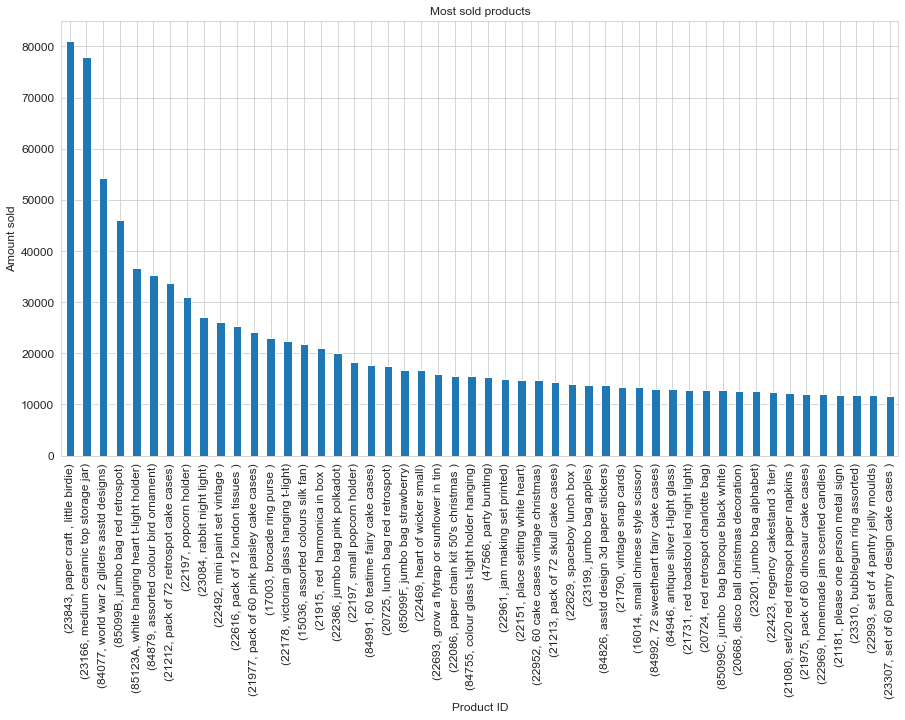

In [70]:
plt.subplots(figsize=(15,8))
most_sold_products.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Amount sold', fontsize=12)
plt.title('Most sold products', fontsize=12)
plt.show()

#### Most profitable products

In [71]:
most_profitable_product = df_new.groupby(by=['stock_code','description'])['amount_spent'].sum().sort_values(ascending=False).iloc[:50]
df_prof_prod = most_profitable_product.to_frame().reset_index().head()

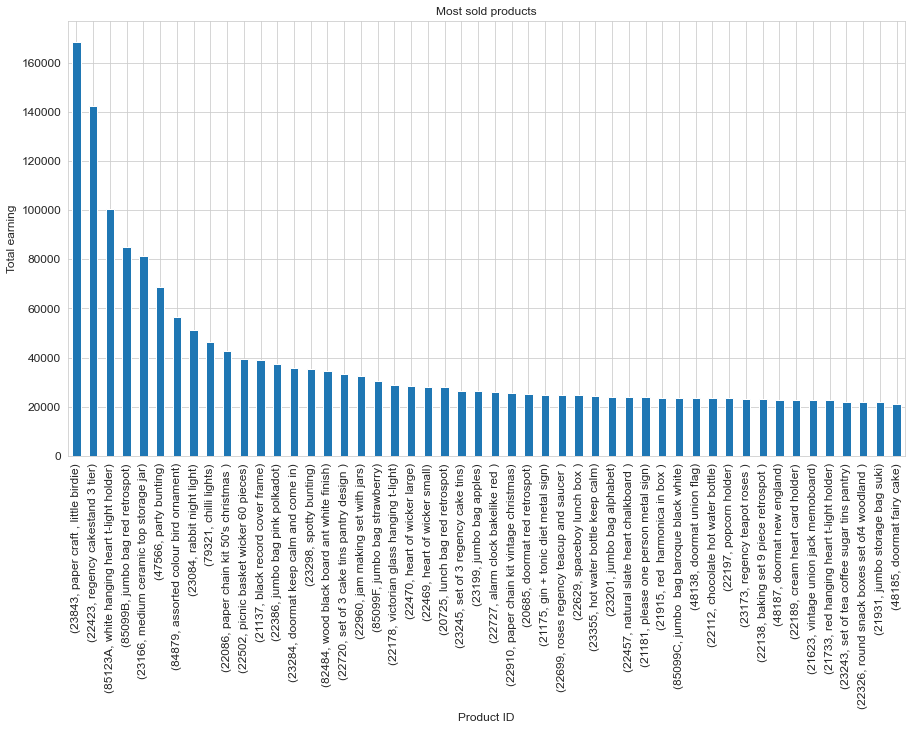

In [72]:
plt.subplots(figsize=(15,8))
most_profitable_product.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total earning', fontsize=12)
plt.title('Most sold products', fontsize=12)
plt.show()

#### How much does the price per unit relate to quantity?

In [73]:
df_new.reset_index().head()

,index,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
0,527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
1,193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
2,527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
3,532744,580996,2011-12-06 17:18:00,201112,12,2,17,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
4,527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


In [74]:
df_3=df_new.drop_duplicates(subset=['stock_code','unit_price','description'])

In [75]:
df_3.sort_values(by=['stock_code','quantity'], inplace=True, ascending=False)
df_3.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom
527066,580691,2011-12-05 15:48:00,201112,12,1,15,90214V,"letter ""v"" bling key ring",12,0.29,3.48,13790,United Kingdom


###### A dictionary of dictionaries to include the unit price and quantities for each item was created

In [76]:
import collections

items_dict = collections.defaultdict(dict)

for product in df_3.iterrows():
    items_dict[product[1][6]][product[1][8]]=[product[1][9]][0]

In [77]:
df_4=pd.DataFrame(list(items_dict.items()),columns = ['stock_code','quantity_price'])
df_4.head()

,stock_code,quantity_price
0,90214Z,{12: 0.29}
1,90214Y,"{12: 0.29, 1: 1.25}"
2,90214W,{12: 0.29}
3,90214V,"{12: 0.29, 1: 1.25}"
4,90214U,{12: 0.29}


#### Checking the items with multiple price per unit

In [78]:
df_5=df_4[df_4.quantity_price.apply(lambda x: len(x.keys())>1)]
df_5.head()

,stock_code,quantity_price
1,90214Y,"{12: 0.29, 1: 1.25}"
3,90214V,"{12: 0.29, 1: 1.25}"
7,90214R,"{12: 0.29, 1: 1.25}"
8,90214P,"{12: 0.29, 1: 1.25}"
10,90214N,"{12: 0.29, 2: 1.25}"


In [79]:
price_list=[]
for el in df_5.quantity_price:
    price_list.append(len(el.keys()))
df_5['counts']=price_list    
df_5=df_5.sort_values(by='counts', ascending=False)

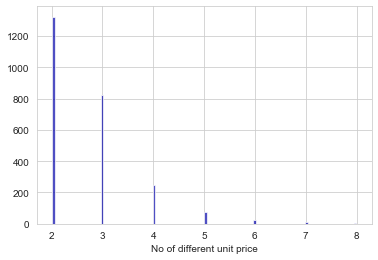

In [80]:
plt.hist(df_5['counts'], bins=100,color='#0504aa',alpha=0.7, rwidth=0.85)
plt.xlabel('No of different unit price')
plt.show()

In [81]:
df_5['counts'].value_counts()

2    1323
3     824
4     251
5      74
6      23
7      11
8       4
Name: counts, dtype: int64

###### Excluding products with just one unit_price, most of the products hve 2 or 3 unit prices.

#### How does the price change in relation to the purchased quantity?

Number:  1


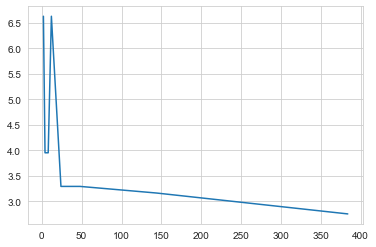

Number:  2


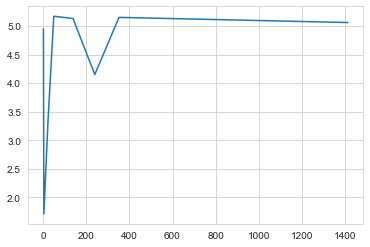

Number:  3


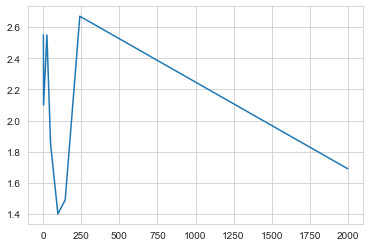

Number:  4


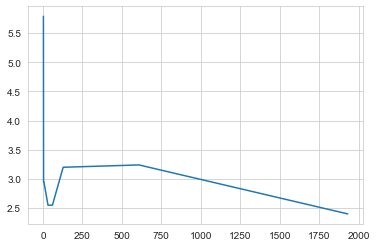

Number:  5


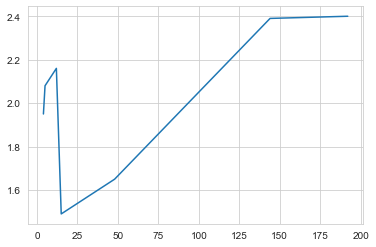

Number:  6


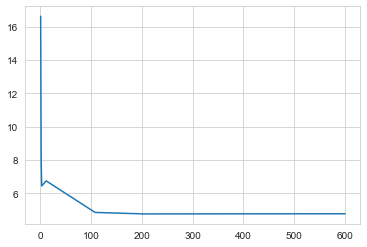

Number:  7


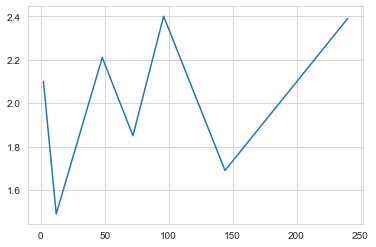

Number:  8


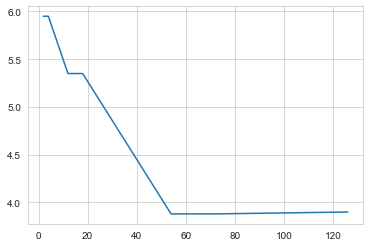

Number:  9


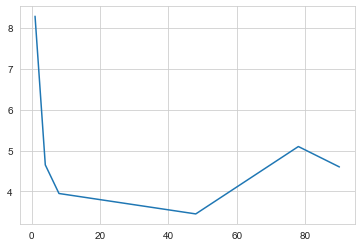

In [82]:
for i in range(1,10): #check first 10 products ordered by the quantity of different unit prices
    print('Number: ', i)
    keys=list(df_5.iloc[i-1:i].quantity_price.values[0].keys())
    values=list(df_5.iloc[i-1:i].quantity_price.values[0].values())
    plt.plot(keys, values)
    plt.show()

###### These plots shows that generally the unit price decresases with increasing quantity with some exceptions.

#### Time series analysis for top sold products

In [83]:
#most sold products dataframe
df_top_prod.head()

,stock_code,description,quantity
0,23843,"paper craft , little birdie",80995
1,23166,medium ceramic top storage jar,77916
2,84077,world war 2 gliders asstd designs,54319
3,85099B,jumbo bag red retrospot,46078
4,85123A,white hanging heart t-light holder,36706


In [84]:
#check the number of transactions related to these top sold products
df_top_50 = df_new[df_new['description'].isin(df_top_prod['description'])]
df_top_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33758 entries, 131386 to 291180
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_num   33758 non-null  object        
 1   invoice_date  33758 non-null  datetime64[ns]
 2   yearmonth     33758 non-null  int64         
 3   month         33758 non-null  int64         
 4   day           33758 non-null  int64         
 5   hour          33758 non-null  int64         
 6   stock_code    33758 non-null  object        
 7   description   33758 non-null  object        
 8   quantity      33758 non-null  int64         
 9   unit_price    33758 non-null  float64       
 10  amount_spent  33758 non-null  float64       
 11  customer_id   33758 non-null  int64         
 12  country       33758 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 3.6+ MB


In [85]:
print('The top 50 most sold products account for the {} % of the total transactions'.format(np.round(len(df_top_50)/len(df_new),2)))

The top 50 most sold products account for the 0.09 % of the total transactions


In [86]:
df_top_50.stock_code.value_counts()

85123A    2016
22423     1714
85099B    1615
84879     1395
47566     1390
20725     1303
22197     1060
21212     1050
22086     1003
22469      979
22386      884
22993      881
22961      870
23084      823
22178      819
23201      757
20724      748
21080      746
21790      731
23199      724
22629      709
21181      705
21977      676
84991      672
85099C     656
85099F     656
21915      564
21975      543
84946      537
84755      530
21731      528
22969      518
23307      516
84992      515
21213      505
22952      479
84077      472
22616      392
15036      325
22492      325
22151      296
22693      239
23310      214
17003      208
23166      198
20668      184
16014       54
84826       33
23843        1
Name: stock_code, dtype: int64

###### It could be interesting to see how the product with stock code '23843' is in the top 50 with just 1 transaction

In [87]:
df_new[df_new['stock_code'] == '23843']

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
540421,581483,2011-12-09 09:15:00,201112,12,5,9,23843,"paper craft , little birdie",80995,2.08,168469.6,16446,United Kingdom


###### This transaction has relations with the most sold product.

In [88]:
#most profitable products
df_prof_prod.head()

,stock_code,description,amount_spent
0,23843,"paper craft , little birdie",168469.60
1,22423,regency cakestand 3 tier,142264.75
2,85123A,white hanging heart t-light holder,100392.10
3,85099B,jumbo bag red retrospot,85040.54
4,23166,medium ceramic top storage jar,81416.73


In [89]:
df_top_50[df_top_50['stock_code'].isin(df_prof_prod.stock_code)].stock_code.value_counts()

85123A    2016
22423     1714
85099B    1615
23166      198
23843        1
Name: stock_code, dtype: int64

###### The top 5 most profitable products with a number of transaction higher than 1000, have the 'stock code' : 85123A, 22423, 85099B

In [90]:
df_top1 = df_new[df_new['stock_code'] == '85123A']
df_top2 = df_new[df_new['stock_code'] == '22423']
df_top3 = df_new[df_new['stock_code'] == '85099B']

Text(0.5, 1.0, 'Sales per day for the Most sold product')

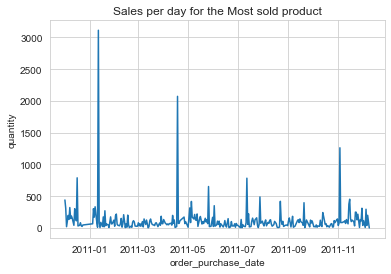

In [91]:
# creating a purchase day feature
df_top1['order_purchase_date'] = df_top1.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top1.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Most sold product')

###### There are indeed some peaks in quantity sold for these product.

Text(0.5, 1.0, 'Sales per day for the Second most sold product')

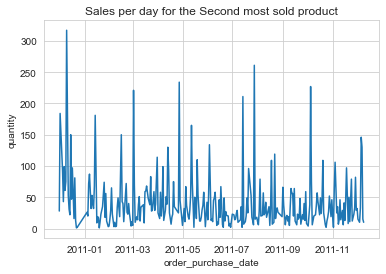

In [92]:
# creating a purchase day feature
df_top2['order_purchase_date'] = df_top2.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top2.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Second most sold product')

Text(0.5, 1.0, 'Sales per day for the Third most sold product')

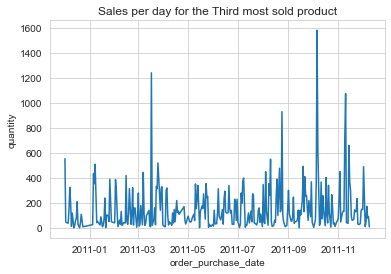

In [93]:
# creating a purchase day feature
df_top3['order_purchase_date'] = df_top3.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top3.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Third most sold product')

###### These plots do not show a clear pattern in the data.